# Lung Cancer Prediction

> The main objective of this notebook is to prepare the dataset for machine learning model training through several key steps, including loading and preprocessing images, visualizing data, and encoding labels.

## 1. Dataset 
> The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .

## 2. Model
>  We are going to use Random Forest Classifier, Logistic Regression and XGBoost Classifier

## 2. Model Evaluation 

1. Accuracy Score
2. Classification Report
3. Confusion Matrix
4. K-Fold
5. Cross Val Score

## 3. Features 

**Total no. of attributes:** 16
**No .of instances:** 284
**Attribute information:**
- `Gender:` M(male), F(female)

- `Age:` Age of the patient

- `Smoking:` YES=2 , NO=1.

- `Yellow fingers:` YES=2 , NO=1.

- `Anxiety:` YES=2 , NO=1.

- `Peer_pressure:` YES=2 , NO=1.

- `Chronic Disease:` YES=2 , NO=1.

- `Fatigue:` YES=2 , NO=1.

- `Allergy:` YES=2 , NO=1.

- `Wheezing:` YES=2 , NO=1.

- `Alcohol:` YES=2 , NO=1.

- `Coughing:` YES=2 , NO=1.

- `Shortness of Breath:` YES=2 , NO=1.

- `Swallowing Difficulty:` YES=2 , NO=1.

- `Chest pain:` YES=2 , NO=1.

- `Lung Cancer:` YES , NO.

## Preparing the tools

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing the Dataset

In [5]:
df = pd.read_csv("lung cancer data.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [9]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [11]:
# Display statistical summary of the dataset
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Exploratory Data Analysis

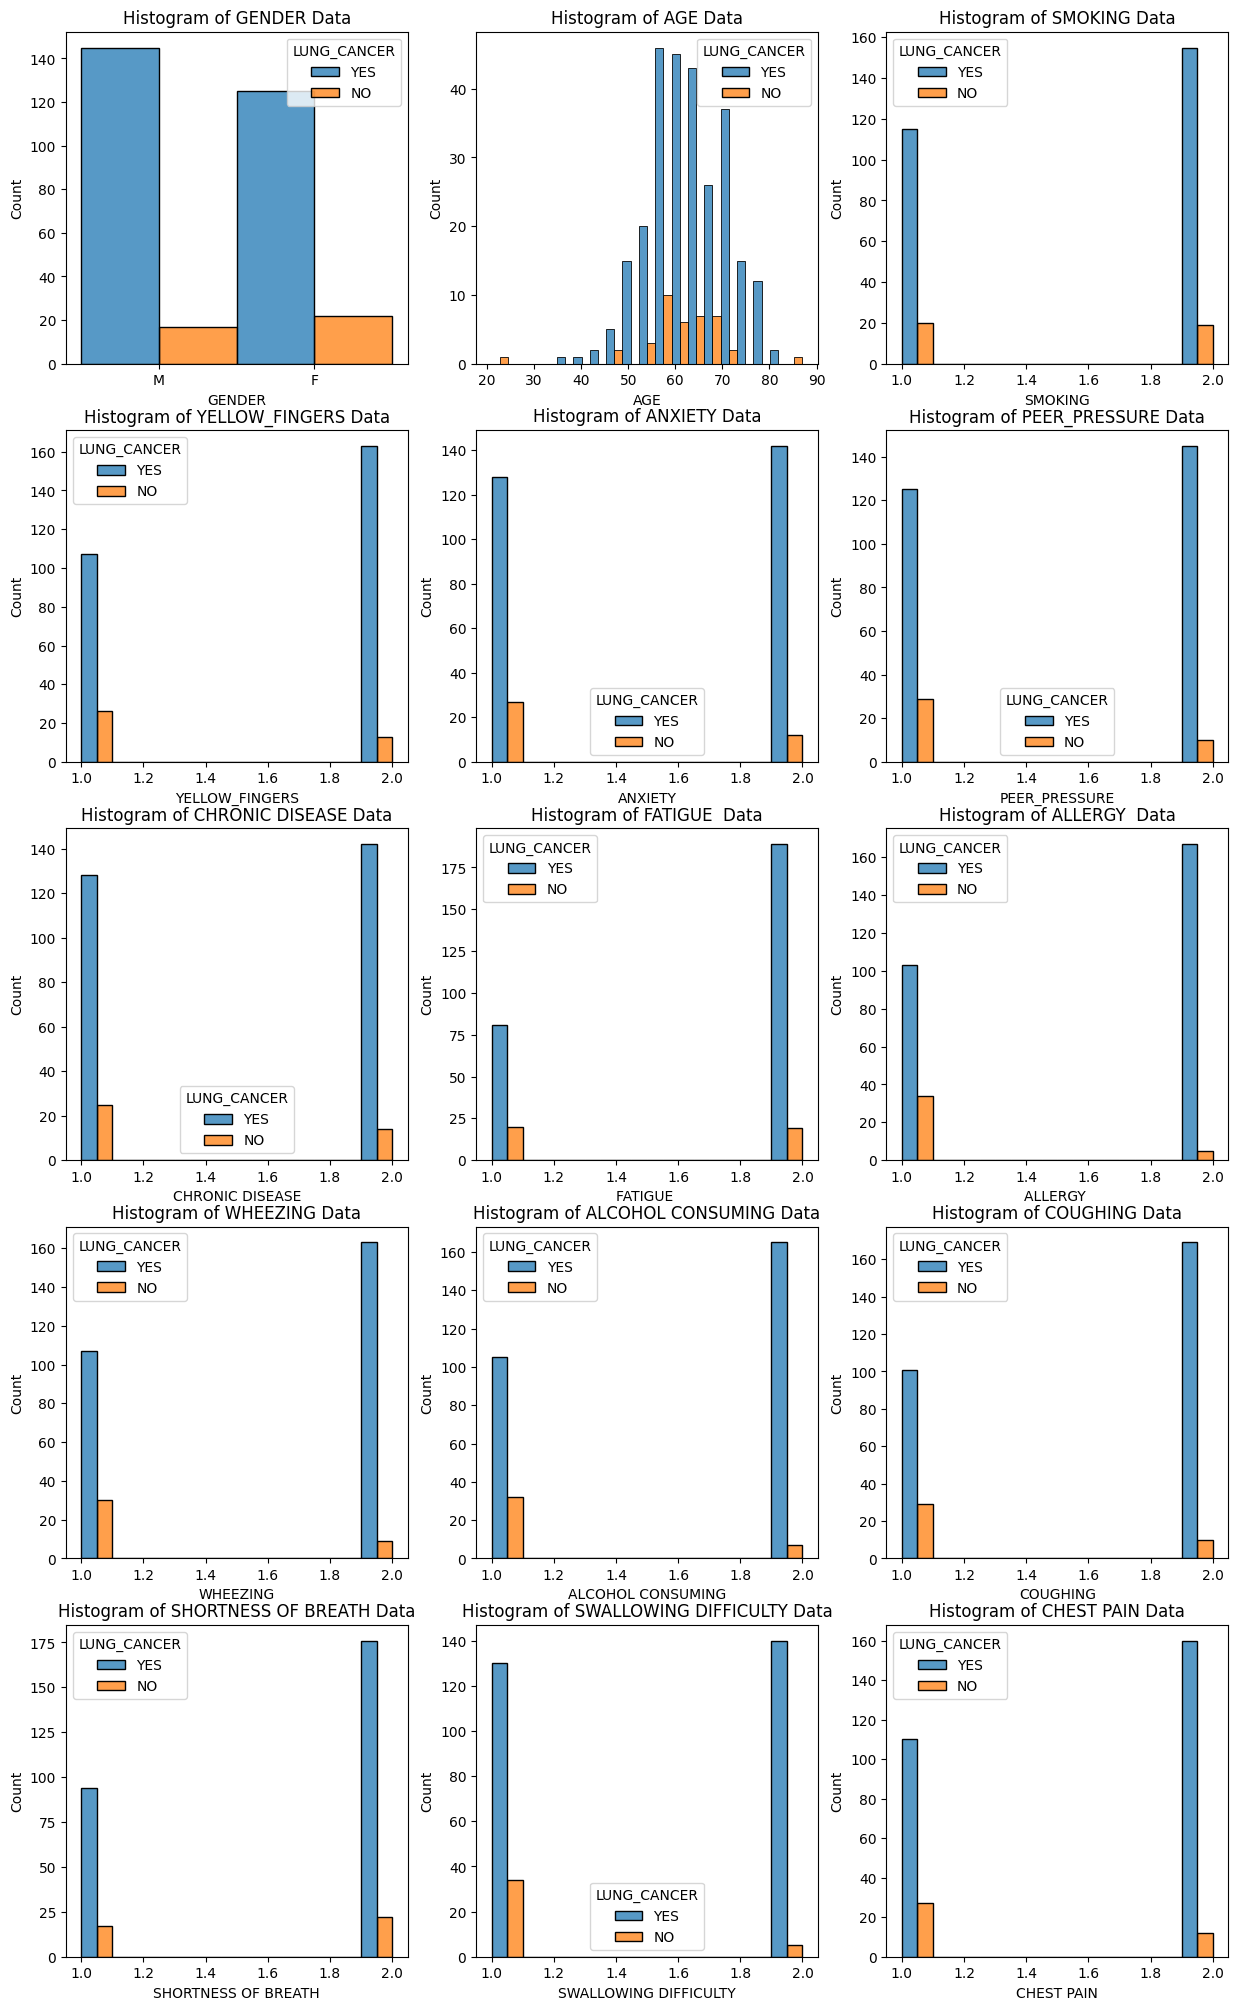

In [12]:
# Histogram of all feature
plt.figure(figsize = (15, 25))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 3, i)
    sns.histplot(x = df[col], hue = df["LUNG_CANCER"], multiple = "dodge")
    plt.title(f"Histogram of {col} Data")
    plt.plot()

<Axes: xlabel='LUNG_CANCER'>

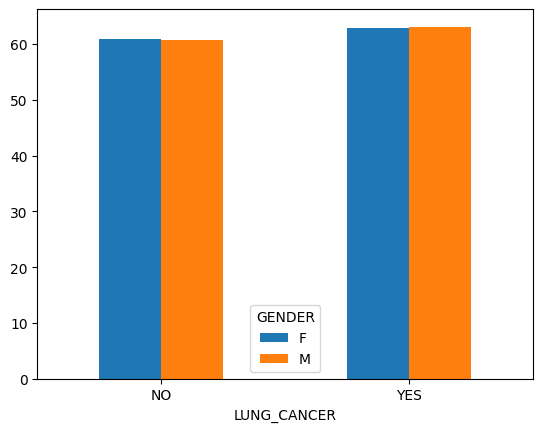

In [13]:
df.pivot_table(index = "LUNG_CANCER", columns = "GENDER", values = "AGE", aggfunc = "mean").plot.bar(rot = 0)

<Axes: xlabel='LUNG_CANCER'>

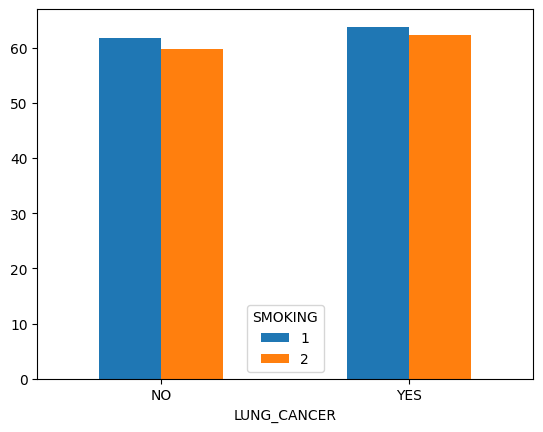

In [14]:
df.pivot_table(index = "LUNG_CANCER", columns = "SMOKING", values = "AGE", aggfunc = "mean").plot.bar(rot = 0)

<Axes: xlabel='LUNG_CANCER'>

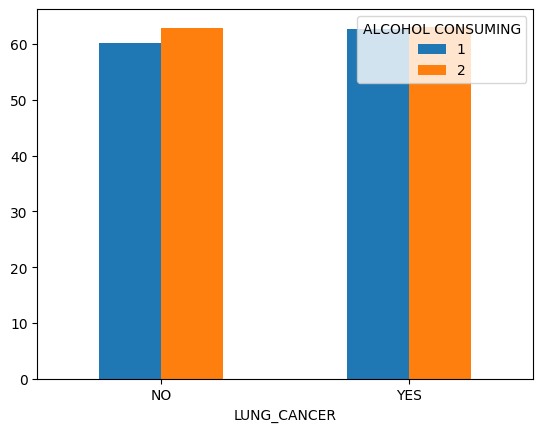

In [15]:
df.pivot_table(index = "LUNG_CANCER", columns = "ALCOHOL CONSUMING", values = "AGE", aggfunc = "mean").plot.bar(rot = 0)

<Axes: xlabel='LUNG_CANCER'>

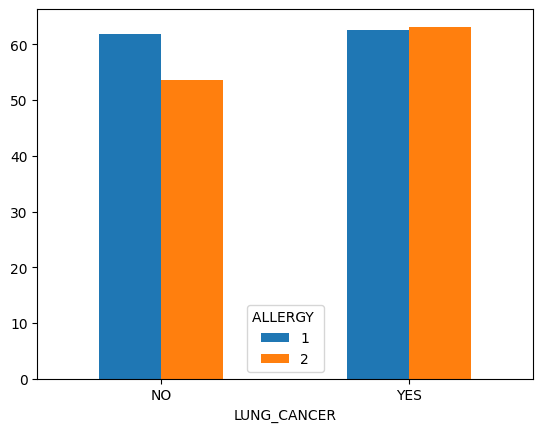

In [16]:
df.pivot_table(index = "LUNG_CANCER", columns = "ALLERGY ", values = "AGE", aggfunc = "mean").plot.bar(rot = 0)

We can see that someting to intake/dring does not affect lung cancer well.

<Axes: xlabel='LUNG_CANCER'>

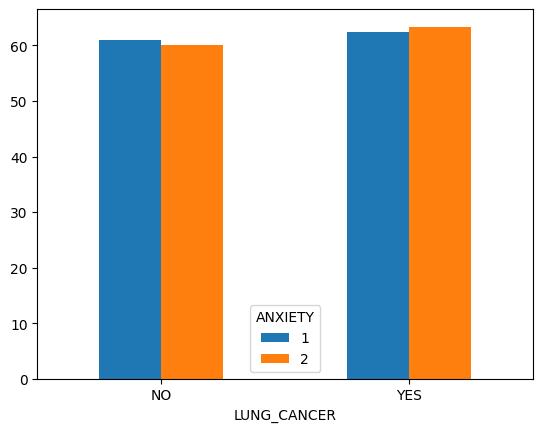

In [17]:
df.pivot_table(index = "LUNG_CANCER", columns = "ANXIETY", values = "AGE", aggfunc = "mean").plot.bar(rot = 0)

<Axes: xlabel='LUNG_CANCER'>

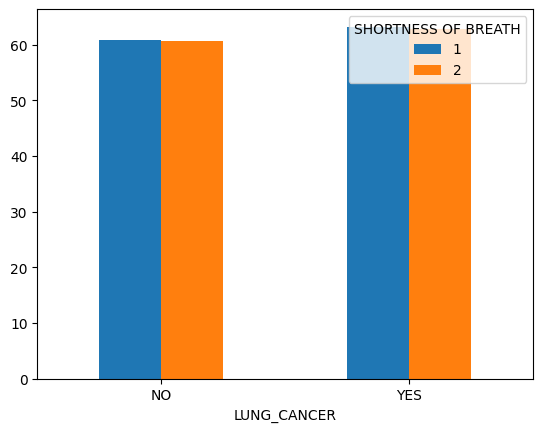

In [18]:
df.pivot_table(index = "LUNG_CANCER", columns = "SHORTNESS OF BREATH", values = "AGE", aggfunc = "mean").plot.bar(rot = 0)

## Data Preprocessing

In [21]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Clean 'GENDER' and 'LUNG_CANCER' columns
df['GENDER'] = df['GENDER'].str.strip()
df['LUNG_CANCER'] = df['LUNG_CANCER'].str.strip()

# Replace numeric values
df.replace({2: 1, 1: 0}, inplace=True)

# Map categorical values to binary for modeling
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [23]:
# Check for missing values
df.isna().sum()

# Check for duplicates and remove them
df.duplicated().sum()
df.drop_duplicates(inplace=True)

### Check the class balance

In [25]:
# Check the class balance in the target variable
print("\nClass balance:")
print(df['LUNG_CANCER'].value_counts(normalize=True))


Class balance:
LUNG_CANCER
1    0.862319
0    0.137681
Name: proportion, dtype: float64


### After Preprocessing, Use EDA again.

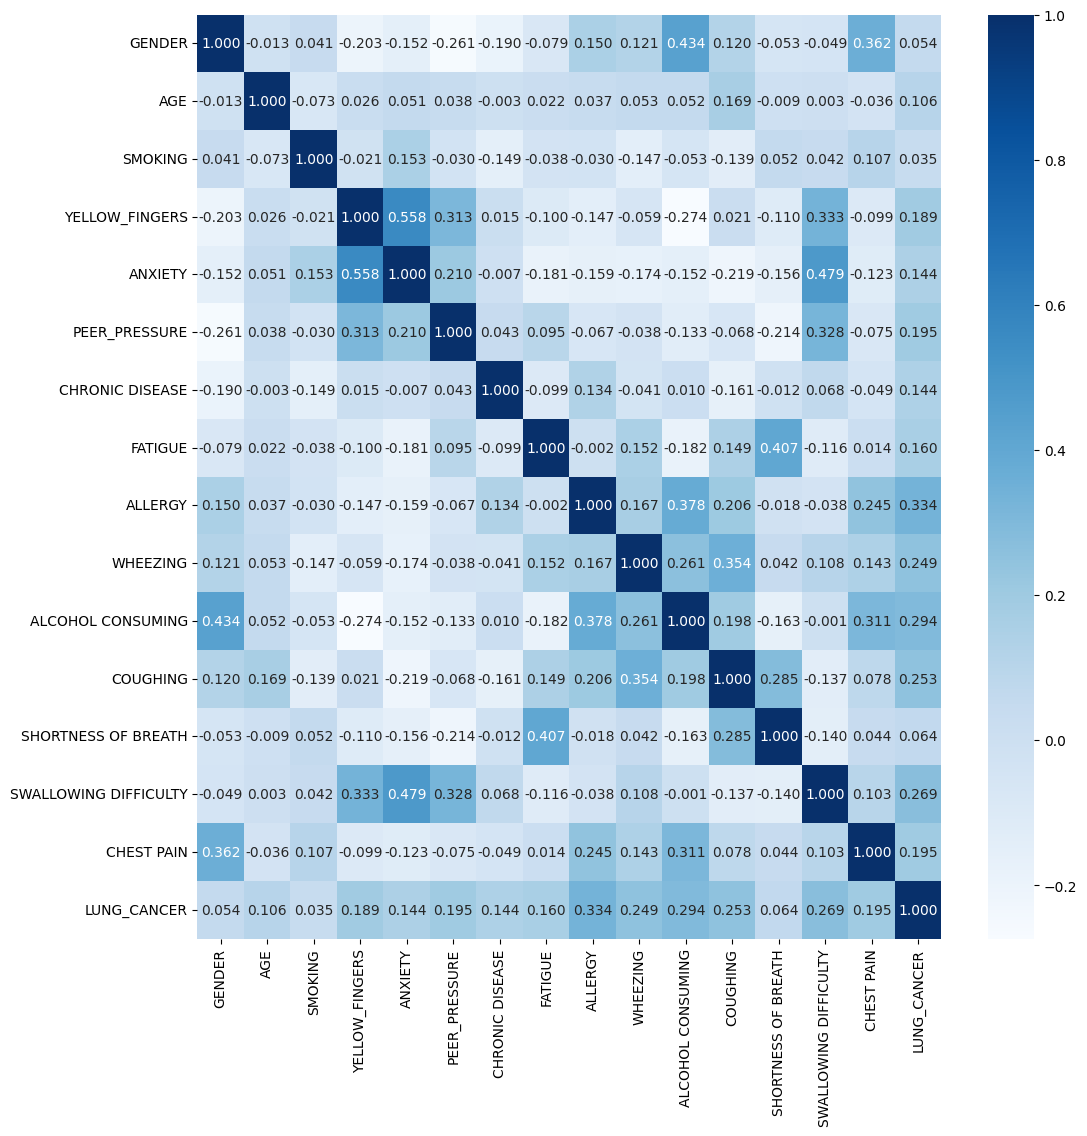

In [28]:
# Correlation of all feature with target("LUNG_CANCER")
df_corr = df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(df_corr, fmt = ".3f", annot = True, cmap = "Blues")
plt.show()

### Distribution of the Age

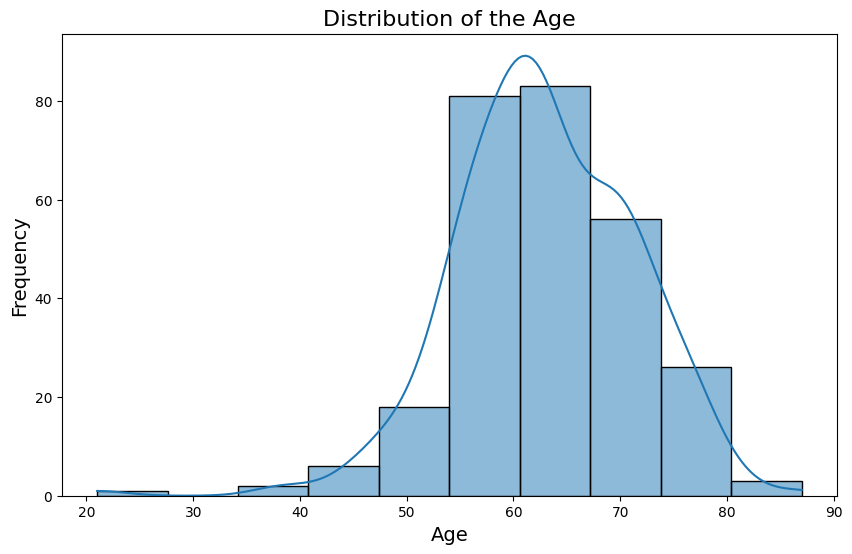

In [31]:
# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['AGE'], bins=10, kde=True)  # Create histogram with kernel density estimate

# Customize the plot
plt.title('Distribution of the Age', fontsize=16)  # Title of the plot
plt.xlabel('Age', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Show the plot
plt.show()

### Above Graph shows a presence of an Outlier!
let's create a boxplot to see more better version of the outlier


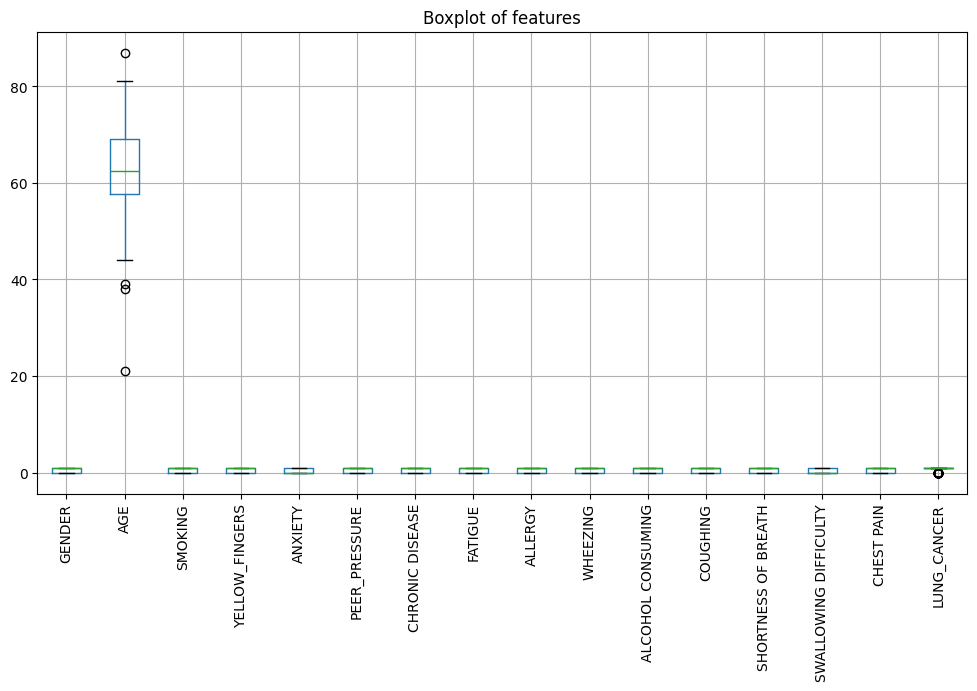

In [33]:
# Boxplot for outlier detection in all features

plt.figure(figsize=(12,6))
df.boxplot()
plt.title('Boxplot of features')
plt.xticks(rotation=90)
plt.show()

## Train-Test Split and Feature Scaling

In [34]:
# Splitting data into features and target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Handling Imbalance with SMOTE

In [35]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [36]:
# Feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_train_resampled, y_train_resampled)
selected_features = X.columns[rfe_selector.support_]

# Display selected features
print("\nSelected features:", selected_features)

# Transforming data to keep only selected features
X_train_selected = X_train_resampled[:, rfe_selector.support_]
X_test_selected = X_test_scaled[:, rfe_selector.support_]


Selected features: Index(['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY'],
      dtype='object')


## Model Training and Evaluation

In [37]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train models and display results
for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.93      0.85      0.89        48

    accuracy                           0.82        56
   macro avg       0.67      0.74      0.70        56
weighted avg       0.86      0.82      0.84        56


Random Forest Results:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.98      0.96      0.97        48

    accuracy                           0.95        56
   macro avg       0.88      0.92      0.90        56
weighted avg       0.95      0.95      0.95        56


SVM Results:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.92      0.96        48

    accuracy                           0.93        56
   macro avg       0.83      0.96      0.88        56
weight

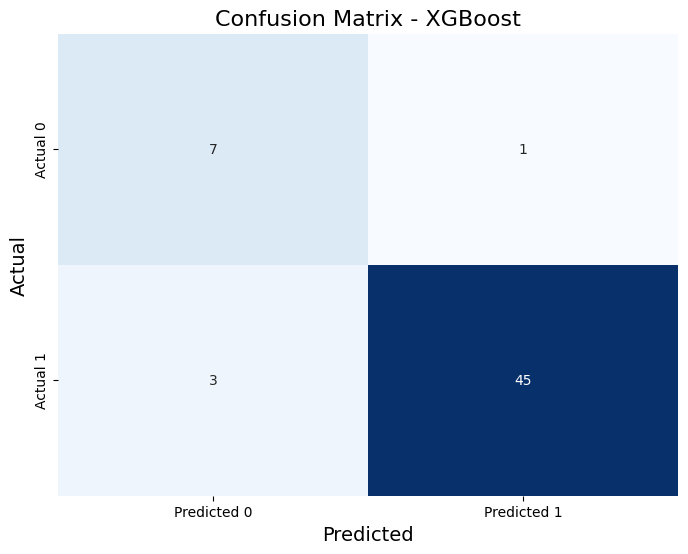

In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

# Customize the plot
plt.title(f'Confusion Matrix - {name}', fontsize=16)  # Title of the plot
plt.xlabel('Predicted', fontsize=14)  # X-axis label
plt.ylabel('Actual', fontsize=14)  # Y-axis label

# Show the plot
plt.show()

## Feature Importance (Random Forest)

C:\Users\HP\AppData\Local\Temp\ipykernel_11464\2668745089.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




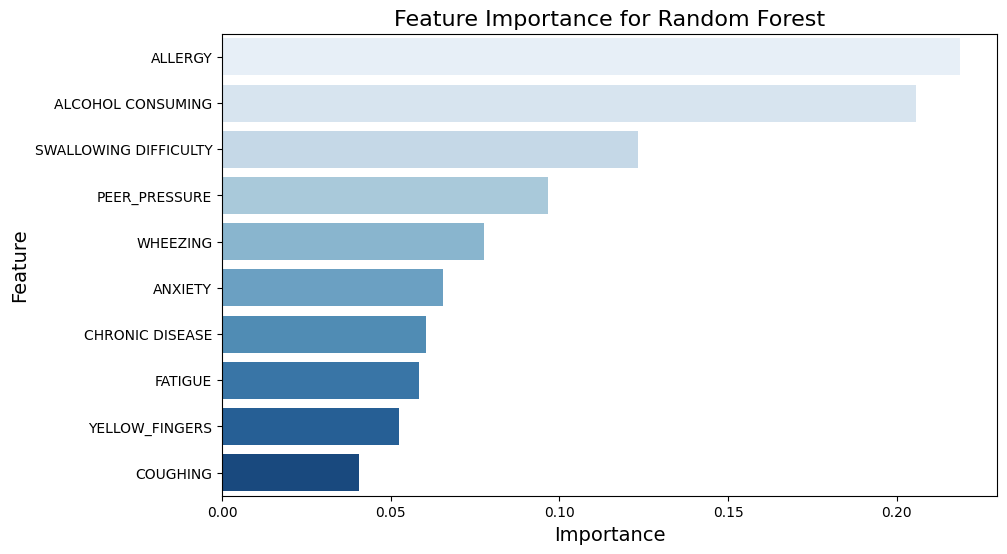

In [40]:
# Plot feature importance for the Random Forest model
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=feature_importance, x='importance', y='feature', orient='h', palette='Blues')

# Customize the plot
plt.title('Feature Importance for Random Forest', fontsize=16)  # Title of the plot
plt.xlabel('Importance', fontsize=14)  # X-axis label
plt.ylabel('Feature', fontsize=14)  # Y-axis label

# Show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11464\561135685.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




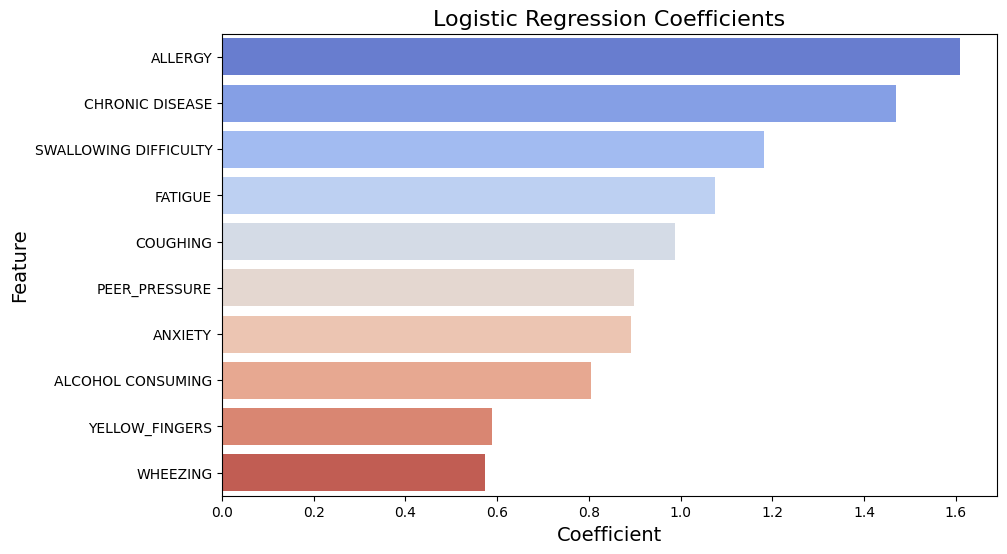

In [42]:
# Plot coefficients from the Logistic Regression model
lr_model = models['Logistic Regression']
coef_df = pd.DataFrame({
    'feature': selected_features,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=coef_df, x='coefficient', y='feature', orient='h', palette='coolwarm')

# Customize the plot
plt.title('Logistic Regression Coefficients', fontsize=16)  # Title of the plot
plt.xlabel('Coefficient', fontsize=14)  # X-axis label
plt.ylabel('Feature', fontsize=14)  # Y-axis label

# Show the plot
plt.show()

## Hyperparameter Tuning

In [49]:
# Dictionary of models initialized
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SupportVectorClassifier": SVC()
}

param_grids = {
    "LogisticRegression": {
        'C': [0.01, 0.1, 1, 10, 100],          # Inverse of regularization strength
        'solver': ['liblinear', 'lbfgs', 'saga']  # Algorithm to use in the optimization problem
    },
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],        # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
        'min_samples_split': [2, 5, 10]        # Minimum number of samples required to split an internal node
    },
    "SupportVectorClassifier": {
        'C': [0.01, 0.1, 1, 10, 100],          # Regularization parameter
        'kernel': ['linear', 'rbf'],           # Specifies the kernel type to be used
        'gamma': ['scale', 'auto']             # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    },
}

## K-Fold Cross Validation

In [50]:
# Extract target variable 'LUNG_CANCER'
y = df["LUNG_CANCER"]

# Standardize the feature columns and create a new DataFrame
x = pd.DataFrame(StandardScaler().fit_transform(df.drop(columns=["LUNG_CANCER"])), 
                 columns=df.drop(columns=["LUNG_CANCER"]).columns)

# Initialize an empty list for results
results1 = []

# Set up K-Fold cross-validation with 16 splits
kf = KFold(n_splits=16, shuffle=True, random_state=42)

# Loop through each model and calculate cross-validated accuracy
for model_name, model_instance in models.items():
    scores = cross_val_score(model_instance, x, y, cv=kf, scoring='accuracy')
    
    # Store model name, fold accuracies, mean, and standard deviation
    results1.append({
        "Model": model_name,
        "Fold_Accuracies": scores.tolist(),  
        "Mean_Accuracy": scores.mean(),      
        "Std_Dev": scores.std()              
    })

# Convert results to DataFrame
pd.DataFrame(results1).sort_values(by="Mean_Accuracy", ascending=True)

,Model,Fold_Accuracies,Mean_Accuracy,Std_Dev
1,RandomForestClassifier,"[0.8888888888888888, 0.8888888888888888, 0.888...",0.898489,0.070446
2,SupportVectorClassifier,"[0.8888888888888888, 0.8333333333333334, 0.944...",0.902165,0.070711
0,LogisticRegression,"[0.8888888888888888, 0.8888888888888888, 1.0, ...",0.927288,0.060075


## Grid-Search & K-Fold

In [51]:
# Initialize an empty list for results and split data into training (20%) and testing (80%)
results3 = []
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

# Dictionary to store the best models and their parameters
best_models = {}

# Perform Grid Search for each model
for model_name, model_instance in models.items():
    print(f"Training {model_name}...")
    
    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=model_instance,
                               param_grid=param_grids[model_name],
                               scoring='accuracy',
                               cv=kf)
    
    # Fit the grid search and store the best estimator
    grid_search.fit(x_train, y_train)
    best_models[model_name] = grid_search.best_estimator_    

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(x_test)
    
    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    results3.append({
        "Model": model_name,
        "Accuracy": accuracy
    })

Training LogisticRegression...


c:\Users\HP\Documents\Projects\Traffic_Sign_Recognition_YOLOv8\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\HP\Documents\Projects\Traffic_Sign_Recognition_YOLOv8\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\HP\Documents\Projects\Traffic_Sign_Recognition_YOLOv8\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\HP\Documents\Projects\Traffic_Sign_Recognition_YOLOv8\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\HP\Documents\Projects\Traffic_Sign_Recognition_YOLOv8\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which mean

Training RandomForestClassifier...
Training SupportVectorClassifier...


In [52]:
print(pd.DataFrame(results3).sort_values(by="Accuracy",ascending=True))

                     Model  Accuracy
0       LogisticRegression  0.855204
2  SupportVectorClassifier  0.855204
1   RandomForestClassifier  0.864253
